In [1]:
!pip install numpy matplotlib seaborn opencv-python tensorflow scikit-learn

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [3]:
data = []
labels = []

for folder, label in [('brain_tumor_dataset/yes', 1), ('brain_tumor_dataset/no', 0)]:
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(label)

# Numpy dizisine çevir ve normalleştir
data = np.array(data).reshape(-1, 128, 128, 1) / 255.0
labels = np.array(labels)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
#Keras'la CNN tasarımı
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5), #Eğitim sırasında rastgele %50 nöron kapatılır. Overfitting'i önlemek için.
    Dense(1, activation='sigmoid') #Tek nöronlu çıkış (çünkü 0 ya da 1 tahmini yapacak). Sigmoid de ikili sınıflandırmaya uygun.
])


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', #İkili sınıflandırma problemleri için kullanılır
              metrics=['accuracy'])


In [8]:
#Model eğitme
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.6199 - loss: 0.7726 - val_accuracy: 0.6667 - val_loss: 0.5837
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7788 - loss: 0.4854 - val_accuracy: 0.7255 - val_loss: 0.5625
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7768 - loss: 0.5276 - val_accuracy: 0.7647 - val_loss: 0.5218
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8166 - loss: 0.4407 - val_accuracy: 0.8039 - val_loss: 0.4853
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7991 - loss: 0.4242 - val_accuracy: 0.8235 - val_loss: 0.4537
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8988 - loss: 0.3412 - val_accuracy: 0.7843 - val_loss: 0.4515
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8683 - loss: 0.2757 - val_accuracy: 0.8627 - val_loss: 0.4309
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8840 - loss: 0.2554 - val_accuracy: 0.8039 - val_loss: 0.4608

In [9]:
# Modeli kaydet
model.save("beyin_tumor_modeli.h5")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.77      0.85      0.81        27

    accuracy                           0.78        51
   macro avg       0.79      0.78      0.78        51
weighted avg       0.79      0.78      0.78        51



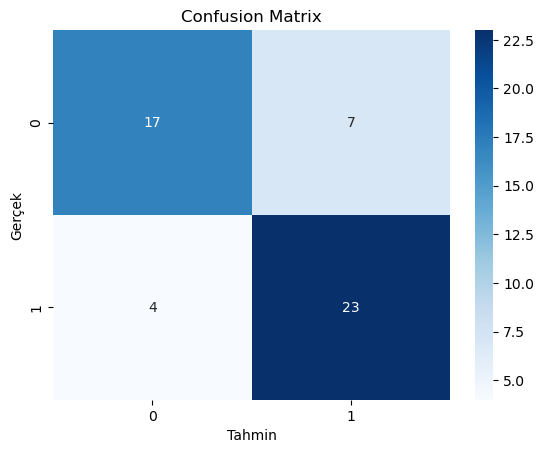

In [11]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class) #precision:pozitif tahminlerin doğruluğu,recall:gerçek pozitiflerin ne kadarını buldu,
#f1-score: Precision ve recall'un dengeli hali

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin") 
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


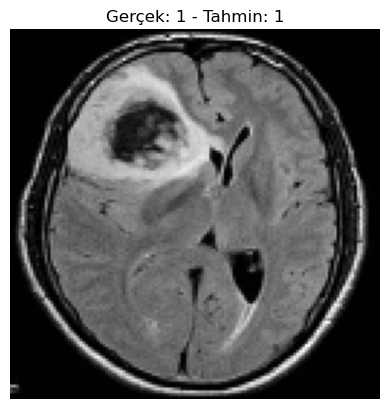

In [14]:
import random
import matplotlib.pyplot as plt

index = random.randint(0, len(X_test) - 1)

plt.imshow(X_test[index].reshape(128, 128), cmap='gray')
plt.title("Gerçek: {} - Tahmin: {}".format(y_test[index], y_pred_class[index][0]))
plt.axis('off')
plt.show()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model("beyin_tumor_modeli.h5")

# Ana pencere
window = tk.Tk()
window.title("Beyin MRI Tümör Tespiti")
window.geometry("600x600")
window.configure(bg="#f0f0f0")

# Başlık
title = tk.Label(window, text="Beyin MRI Tümör Tespiti", font=("Helvetica", 20, "bold"), bg="#f0f0f0", fg="#333")
title.pack(pady=20)

# Görsel gösterimi
image_label = tk.Label(window, bg="#f0f0f0")
image_label.pack(pady=10)

# Tahmin sonucu
result_label = tk.Label(window, text="", font=("Helvetica", 18), bg="#f0f0f0")
result_label.pack(pady=20)

# Yükle ve tahmin et fonksiyonu
def load_and_predict():
    filepath = filedialog.askopenfilename(
    filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tif *.tiff")]
)

    if not filepath:
        return

    # Görüntüyü oku
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128))
    img_input = img_resized.reshape(1, 128, 128, 1) / 255.0

    # Tahmin
    prediction = model.predict(img_input)
    predicted_class = "Tümör Tespit Edildi" if prediction > 0.5 else "Tümör Tespit Edilmedi"
    color = "#d9534f" if prediction > 0.5 else "#5cb85c"

    # Görüntüyü göster
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    img_pil = Image.fromarray(img_rgb).resize((256, 256))
    img_tk = ImageTk.PhotoImage(image=img_pil)
    image_label.config(image=img_tk)
    image_label.image = img_tk

    # Sonucu yazdır
    result_label.config(text=f"{predicted_class}\n(Tahmin değeri: {prediction[0][0]:.2f})", fg=color)

# Buton
style = ttk.Style()
style.configure("TButton", font=("Helvetica", 14), padding=10)
predict_button = ttk.Button(window, text="MRI Görüntüsü Yükle ve Tahmin Et", command=load_and_predict)
predict_button.pack(pady=30)

# Başlat
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
